# Introduction to matplotlib


## Overview

matplotlib is a python library that is useful for making static visualizations, including scientific visualizations

Rather than using a Grammar of Graphics approach (which we will utilize with Altair), matplotlib can be used to make specific types of visualizations (scatterplots, barplots, etc.).

It offers many options and can be highly customized, although it can sometimes be difficult to figure out how to do something specific. The documentation and sites like stackoverflow are helpful here.

Additional tutorials are available here: https://matplotlib.org/stable/tutorials/index

## Environment setup

In [1]:
import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000)

from collections import Counter

## A simple example

Let's first create a simple dataset and make a plot

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


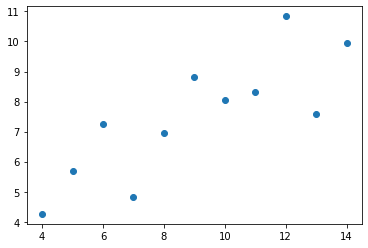

In [3]:
# Create some data
x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

# Create a plot
fig, ax = plt.subplots()

print(type(fig))
print(type(ax))

# fig is a variable referring to the overall plot
# ax is a variable referring to a specific pane of a plot (an "axis"), of which there is only one in this case

# Plot the data on the axis as a scatter plot
ax.scatter(x, y)

# Show the plot
plt.show()

## Creating plots with multiple panes

<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


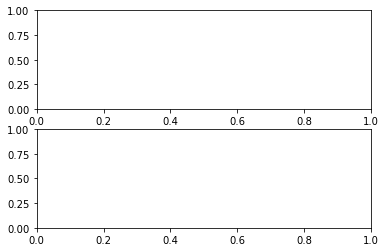

In [5]:
# Create a plot with multiple panes (2 rows)
fig, axes = plt.subplots(nrows=2)

print(type(axes))
print(type(axes[0]))

plt.show()

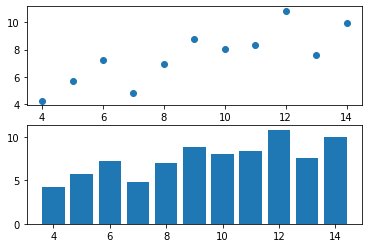

In [6]:
fig, axes = plt.subplots(nrows=2)

# plot the data on the first axis
ax = axes[0]
ax.scatter(x, y)

# plot it as a bar plot on the second axis
ax = axes[1]
ax.bar(x, y)

plt.show()

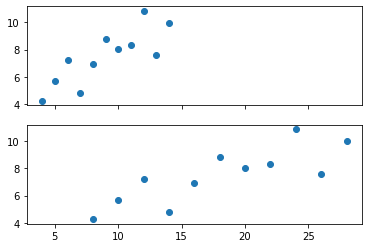

In [7]:
# Link the panes together (use the same x-axis)
fig, axes = plt.subplots(nrows=2, sharex=True)

# plot the data on the first axis
ax = axes[0]
ax.scatter(x, y)

# plot it as a bar plot on the second axis
ax = axes[1]
ax.scatter([val * 2 for val in x], y)

plt.show()

### Optional exercise: Create the above plot with two columns instead of two rows

## Plot aesthetics (figure size, symbols, labels, tickmarks, and legends)

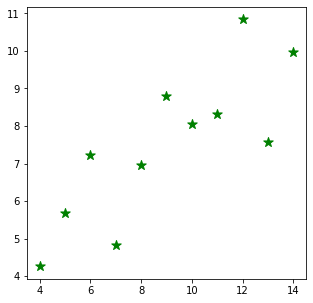

In [8]:

# Create a square figure
fig, ax = plt.subplots(figsize=(5, 5))

# Change the size and color of the scatter plot
ax.scatter(x, y, s=100, color='green', marker='*')

# For more colors, see: https://matplotlib.org/stable/gallery/color/named_colors.html

# For marker styles, see: https://matplotlib.org/stable/api/markers_api.html

plt.show()

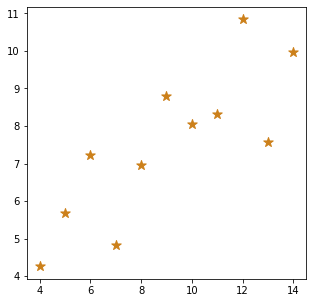

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

# Can also specifiy colors using RGB values
ax.scatter(x, y, s=100, color=[0.8, 0.5, 0.1], marker='*')

plt.show()

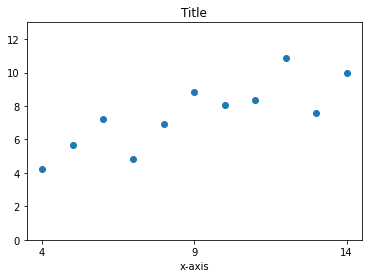

In [10]:
fig, ax = plt.subplots()

ax.scatter(x, y)

# Change the limits of the y-axis
ax.set_ylim(0, 13)

# Change the tick-marks on x-axis
ax.set_xticks([4, 9, 14])

# Add a label on the x-axis
ax.set_xlabel("x-axis")

# Add a title:
ax.set_title("Title")


# Show the plot
plt.show()

### Optional exercise: make a scatter plot using red squares, and put a label on the y-axis

## Adding text labels to plot

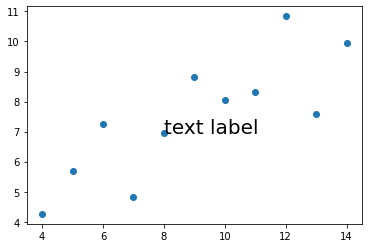

In [12]:

fig, ax = plt.subplots()

ax.scatter(x, y)

# Add a big text label for the second point (note that it is not jittered)
ax.text(x[1], y[1], 'text label', size=20)

plt.show()

## Additional dimensions

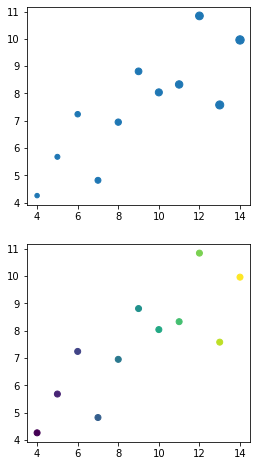

In [13]:
# Add a third dimension of data
z = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])

fig, axes = plt.subplots(nrows=2, figsize=(4, 8))

# make a scatter plot, use the z variable to control size
ax = axes[0]
ax.scatter(x, y, s=z*5)

# or use the z variable to control color
ax = axes[1]
ax.scatter(x, y, c=z)

plt.show()

<class 'matplotlib.collections.PathCollection'>


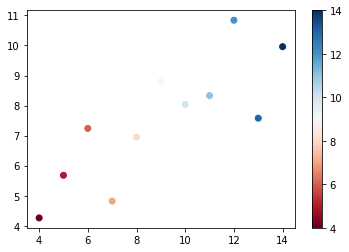

In [14]:
fig, ax = plt.subplots()

# Use a different color mapping, and get the object for this scatter plot
output = ax.scatter(x, y, c=z, cmap='RdBu')
print(type(output))

plt.colorbar(output, ax=ax)

plt.show()

# Line plots, legends, and default colors

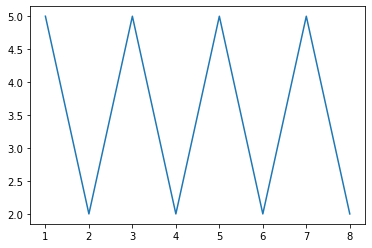

In [15]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [5, 2, 5, 2, 5, 2, 5, 2]
z = [2, 4, 5, 4, 1, 3, 6, 4]

fig, ax = plt.subplots()

# The default plot is a line plot
ax.plot(x, y)

plt.show()

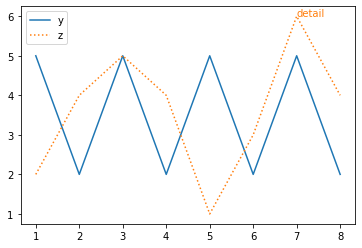

In [16]:
fig, ax = plt.subplots()

# We can name the lines using "label"
ax.plot(x, y, label='y')

# We can also put additional series on the same axis (and use a different line-style)
ax.plot(x, z, label='z', linestyle=':')

# It will automatically change the color, which we can access as C0, C1, C2, ...

# Add a text detail in the second color
ax.text(x[-2], z[-2], 'detail', color='C1')

# The line names will automatically show up in the legend, which we place in a corner
ax.legend(loc='upper left')

plt.show()

## Working with data

In [17]:
# Load the movies data
df = pd.read_csv('movies_independent_part_2.csv', index_col=0)
df.head()

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,director,director_gender,genre,rating,country,language
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,13000000,25682380.0,42195766.0,1.0,1.0,Jon Lucas,male,Comedy,5.9,United States,English
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,45658735,13611086.0,41467257.0,1.0,1.0,Pete Travis,male,Action,7.1,United Kingdom,English
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,20000000,53107035.0,158607035.0,1.0,1.0,Steve McQueen,male,Biography,8.1,United States,English
3,2013,tt1272878,2 Guns,notalk,notalk,FAIL,61000000,75612460.0,132493015.0,2013FAIL,61000000,75612460.0,132493015.0,1.0,1.0,Baltasar Kormákur,male,Action,6.7,United States,English
4,2013,tt0453562,42,men,men,FAIL,40000000,95020213.0,95020213.0,2013FAIL,40000000,95020213.0,95020213.0,1.0,1.0,Brian Helgeland,male,Biography,7.5,United States,English


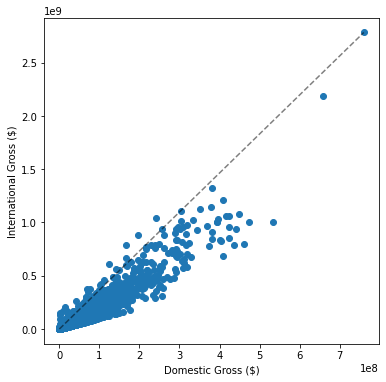

In [18]:
# plot domestic gross against international gross
x = df['domgross'].values
y = df['intgross'].values

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y)
ax.set_xlabel('Domestic Gross ($)')
ax.set_ylabel('International Gross ($)')

# add a dashed line for the diagonal
ax.plot([min(x), max(x)], [min(y), max(y)], linestyle='--', color='k', alpha=0.5)

plt.show()


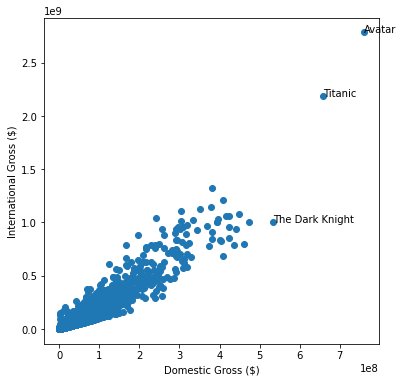

In [19]:
# plot domestic gross against international gross
x = df['domgross'].values
y = df['intgross'].values

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y)
ax.set_xlabel('Domestic Gross ($)')
ax.set_ylabel('International Gross ($)')


titles = df['title'].values
for i, xi in enumerate(x):
    if xi  > 5e8:
        ax.text(x[i], y[i], titles[i])

plt.show()


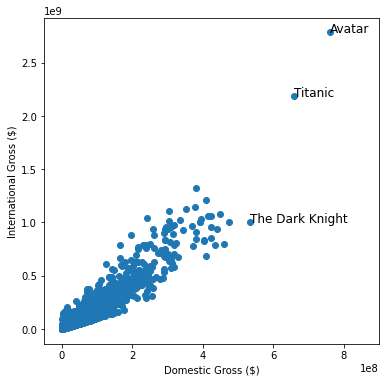

In [20]:
# increase the font size, and adjust the limits to make the text fit in
x = df['domgross'].values
y = df['intgross'].values

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y)
ax.set_xlabel('Domestic Gross ($)')
ax.set_ylabel('International Gross ($)')


titles = df['title'].values
for i, xi in enumerate(x):
    if xi  > 5e8:
        ax.text(x[i], y[i], titles[i], size=12)

ax.set_xlim(-0.5e8, 9e8)
        
plt.show()


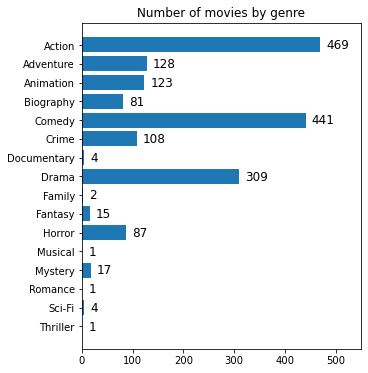

In [24]:
# Get the genres, dropping nans
genres = df['genre'].dropna().values

genre_counter = Counter(genres)
n_genres = len(genre_counter)

# get a sorted list of genres, in reverse alphabetical order
list_of_genres = sorted(genre_counter)[::-1]

# get the count for each genre
genre_counts = [genre_counter[g] for g in list_of_genres]

# Make a bar plot of genre counts
fig, ax = plt.subplots(figsize=(5, 6))

ax.barh(range(n_genres), genre_counts)

ax.set_yticks(range(n_genres))
ax.set_yticklabels(list_of_genres)

# add text labels for the counts  (with some minor tweaks)
for i, g in enumerate(list_of_genres):
    ax.text(genre_counter[g]+12, i-0.2, str(genre_counter[g]), size=12)
    
# fix the plot limits
ax.set_xlim(0, 550)
    
ax.set_title('Number of movies by genre')
    
plt.show()

### Optional exercise: Modify the above plot to put the number labels inside the bar, in white text, for those movies with count > 100